In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
from plotly import express as px

In [3]:
from freedom_simulator import simulate_for_expense_percent, inflation_yearly, nifty_returns

## Estimate for 0.5% spend in a month

In [4]:
expense_percent = 0.00

## Distribution of returns and inflation

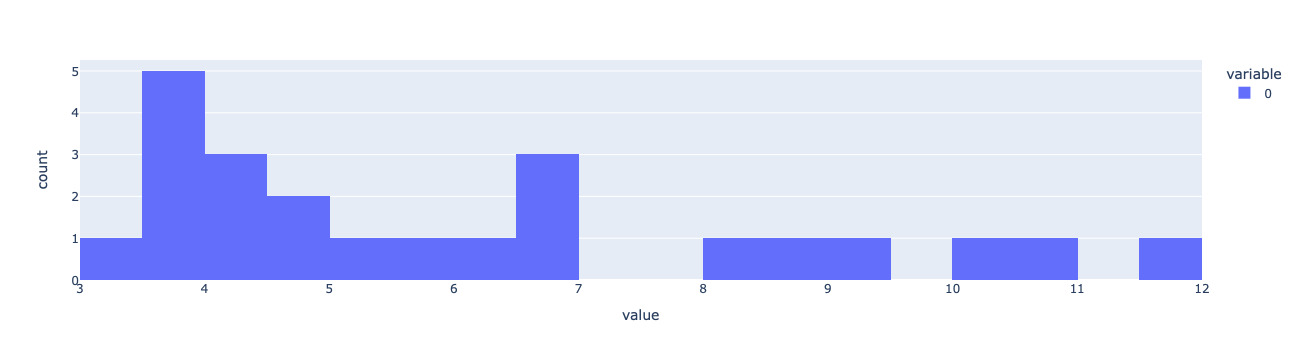

Mean Yearly Inflation: 6.16
Median Yearly Inflation: 5.13


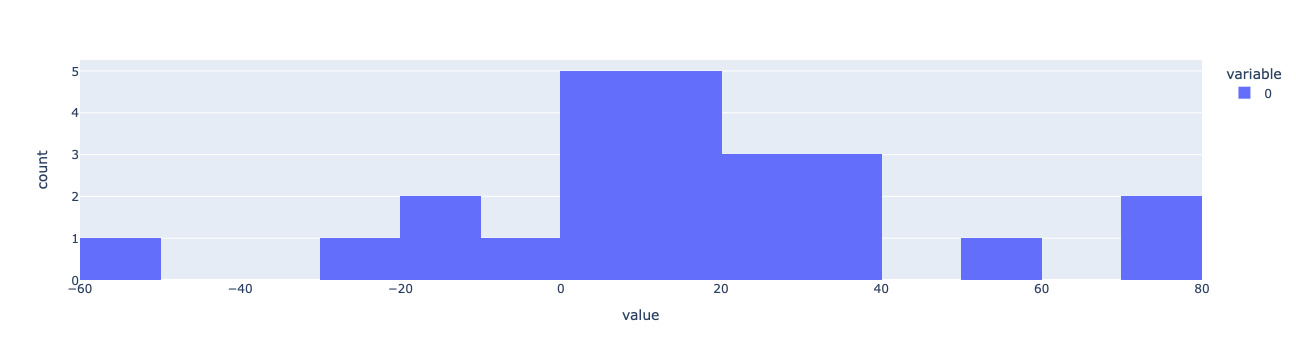

Mean Monthly Return: 15.61
Median Monthly Return: 13.46


In [8]:
px.histogram(inflation_yearly, nbins=20).show()
print(f"Mean Yearly Inflation: {np.mean(inflation_yearly) :0.2f}")
print(f"Median Yearly Inflation: {np.median(inflation_yearly) :0.2f}")


px.histogram(nifty_returns, nbins=20).show()
print(f"Mean Monthly Return: {np.mean(nifty_returns) :0.2f}")
print(f"Median Monthly Return: {np.median(nifty_returns) :0.2f}")

In [24]:
def survival_stats(investments, year_end):
    # print("-----------------------")
    above_2 = sum(np.where(investments.iloc[year_end*12-1] > 2, 1,0))
    above_1 = sum(np.where(investments.iloc[year_end*12-1] > 1, 1,0))
    above_0 = sum(np.where(investments.iloc[year_end*12-1] > 0, 1,0))
    # print(f"At the end of year {year_end}")
    # print(f"Investment more than doubles its real value in {above_2 / len(investments.iloc[year_end*12-1]) * 100 :.2f}% cases")
    # print(f"Investment retains its real value in {above_1 / len(investments.iloc[year_end*12-1]) * 100 :.2f}% cases")
    # print(f"Investment survives in {above_0 / len(investments.iloc[year_end*12-1]) * 100 :.2f}% cases")
    # print("-----------------------")
    return above_2 / len(investments.iloc[year_end*12-1]) * 100, above_1 / len(investments.iloc[year_end*12-1]) * 100, above_0 / len(investments.iloc[year_end*12-1]) * 100

def plot_real_investments(expense_percent, last_year):
    investment_dict = {}
    total_trials = 200
    for trial in range(1,total_trials+1):
        data = simulate_for_expense_percent(expense_percent)
        
        investment_dict[trial] = data['real_investment'].values
    investments = pd.DataFrame(investment_dict)

    investments = investments.where(investments < 5 , 5)
    # print(investments)
    # print(f"At initial expense percentage [monthly spend as percet of initial investment] : {expense_percent*100}%")
    return survival_stats(investments, last_year)

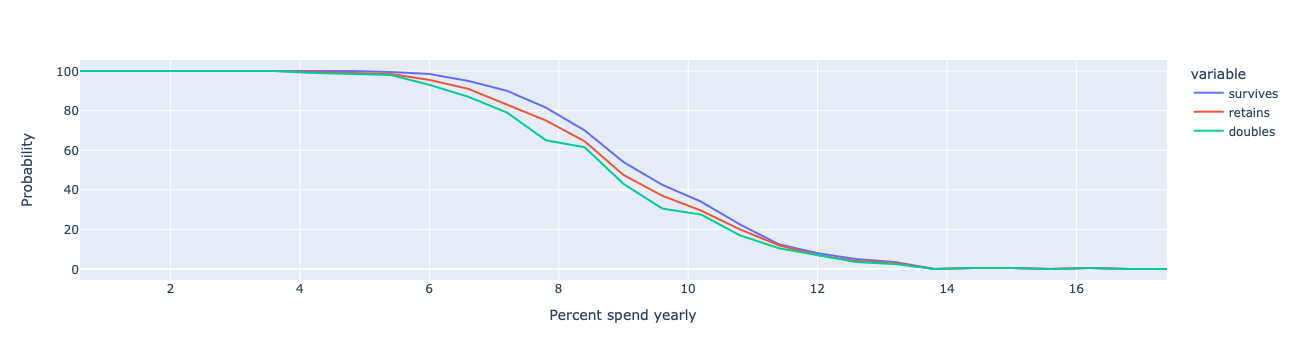

In [31]:
last_year = 40
probabilities = defaultdict(list)
for iter_var in range(1,30):
    expense_proportion = iter_var/2000
    doubles, retains, survives = plot_real_investments(expense_proportion, last_year)
    
    probabilities['expense_proportion'].append(expense_proportion*1200)
    probabilities['doubles'].append(doubles)
    probabilities['retains'].append(retains)
    probabilities['survives'].append(survives)

data_final = pd.DataFrame(probabilities)
fig = px.line(data_final, x='expense_proportion', y=['survives', 'retains', 'doubles'])
fig.update_layout(yaxis_title="Probability", xaxis_title="Percent spend yearly")

In [19]:
6*12

72